# # Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Problem Statement
The project involves a supervised machine learning task with two sub-tasks: a multiclass classification to predict the primary_fuel and a regression task to predict the capacity_mw based on the given dataset and features.

Goal is to build and train a machine learning model that can accurately predict these two target variables based on the provided attributes.

### Importing Necessary Libraries

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore

### Loading the Data Set

In [276]:
df = pd.read_csv('Powerplant.csv')

In [277]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


### Exploratory Data Analysis

In [278]:
df.shape

(907, 27)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [280]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# Observations from the Dataset
The dataset contains information about global power plants. It consists of various attributes related to power plants, including their location, capacity, fuel type, generation data, and more.

Missing Values
The dataset contains missing values in several columns:

Data Types
The dataset consists of both numerical and categorical columns.

Unique Identifiers
The gppd_idnr column serves as a unique identifier for each power plant.

Generation Data
The dataset includes columns related to electricity generation (generation_gwh columns) for multiple years. However, there are significant missing values in these columns, which might impact the analysis and modeling related to electricity generation.

Other Observations
The wepp_id column has no non-null values, suggesting it may not be useful for analysis.
The estimated_generation_gwh column has all missing values, which might indicate that estimated generation data is not provided in the dataset.

Overall, the dataset has missing values and a mix of numerical and categorical attributes. Addressing missing values, data preprocessing, and feature engineering will be essential before building machine learning models for predicting primary fuel and capacity.

# Droping Columns

In [281]:
df.drop(['other_fuel2','other_fuel3','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [282]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
wepp_id                   float64
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

### Data type Unique Values 

In [283]:
df['country'].unique()

array(['IND'], dtype=object)

In [284]:
df['country_long'].unique()

array(['India'], dtype=object)

In [285]:
df['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [286]:
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000019',
       'WRI1019905', 'IND0000020', 'IND0000021', 'IND0000022',
       'IND0000023', 'IND0000025', 'IND0000024', 'WRI1019941',
       'WRI1019882', 'IND0000026', 'IND0000027', 'IND0000028',
       'IND0000029', 'IND0000030', 'IND0000031', 'IND0000032',
       'WRI1019883', 'IND0000033', 'IND0000034', 'IND0000035',
       'IND0000036', 'IND0000037', 'IND0000038', 'IND00

In [287]:
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [288]:
df['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 28.506 , 16.2804, 33.1815, 32.8063,
       23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956, 32.1686,
       24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999, 22.9417,
       25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546, 17.3816,
       20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932, 13.7008,
       13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012, 19.5132,
       21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 , 18.455 ,
       18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172, 24.8263,
       22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145, 21.2083,
        9.9975, 10.0

In [289]:
df['longitude'].unique()

array([73.2407, 74.609 , 69.3732, 91.3602, 82.4091, 68.6447, 77.0078,
       77.207 , 75.8863, 81.6373, 77.9009, 76.4938, 82.8   , 77.8769,
           nan, 82.7891, 76.3188, 81.7841, 81.7865, 76.1851, 74.7061,
       74.9191, 79.5286, 83.2741, 79.1518, 74.2402, 76.3926, 77.687 ,
       73.6396, 77.1893, 76.3482, 71.6917, 71.6918, 71.6916, 77.3066,
       75.225 , 75.3155, 76.1418, 87.4513, 82.1221, 79.3421, 74.689 ,
       82.4305, 88.4042, 76.4695, 81.2875, 81.2747, 74.2562, 83.1889,
       91.565 , 86.0218, 79.925 , 85.7452, 79.8066, 73.2   , 80.2682,
       78.241 , 76.7986, 74.5345, 79.0547, 74.8209, 74.7111, 76.7909,
       77.1036, 76.7195, 75.6373, 75.7131, 76.4328, 79.6311, 79.7708,
       73.8087, 73.7252, 73.4173, 72.2222, 77.758 , 77.8659, 77.7145,
       74.7529, 81.4237, 73.3907, 73.3498, 73.4527, 75.8425, 74.6216,
       78.1606, 78.1336, 73.0901, 83.2058, 76.6537, 81.0333, 86.0888,
       85.88  , 90.5287, 74.1543, 76.3744, 88.14  , 76.532 , 78.9535,
       78.9333, 76.1

In [290]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [291]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [292]:
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [293]:
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [294]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [295]:
df['url'].unique()

array(['http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=262',
       'http://www.ultratechcement.com/',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1328700673.83/view',
       'http://www.cea.nic.in/', 'http://www.hindustanpowerprojects.com/',
       'http://www.ambedkarsugar.com/',
       'http://www.mapsofindia.com/whitepages/foods-and-beverages/food-processors-and-manufacturers/ashokssklimited',
       'http://www.renukasugars.com/',
       'http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=254',
       'http://www.navbharatbuildcon.com/windmill--solar-plant.html',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1216117082.43/view',
       'http://www.meil.in/power-projects',
       'https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1348755977.79/view',
       'https://cdm.unfccc.int/Projects/DB/BVQI1379744232.36/viewhttps://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1278588174.29/view',
       'http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.p

In [296]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [297]:
df['wepp_id'].unique()

array([nan])

In [298]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [299]:
df['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 2.93600000e+03,
       2.92521045e+03, 7.92686650e+02, 7.23528100e+03, 1.33253385e+03,
       9.46141000e+02, 1.07595320e+03, 8.56595500e+01, 1.20444750e+02,
       2.65780000e+02, 3.04832800e+02, 4.95967700e+02, 1.22100000e+03,
       5.05760000e+02, 1.25573200e+03, 2.85387000e+00, 1.24631710e+03,
       2.93534950e+02, 5.44576300e+03, 5.03370500e+01, 5.24180925e+03,
       6.50730000e+01, 1.36872200e+02, 6.75605000e+01, 2.96272000e+03,
       8.32884650e+02, 9.07937500e+01, 2.99176600e+02, 5.85507000e+03,
       2.23699080e+03, 1.43887000e+03, 8.11580000e+00, 1.45560000e+02,
       5.37195000e+03, 2.34650850e+02, 3.30595670e+03, 3.73919000e+02,
       1.49121645e+03, 2.53904100e+03, 1.01567610e+03, 4.48805700e+03,
      

In [300]:
df['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       2.01300000e+03, 2.98513930e+03, 5.53220000e+01, 7.41862050e+02,
       5.97912500e+03, 1.43795470e+03, 6.18909900e+02, 1.96760200e+02,
       9.48831000e+02, 5.71607600e+02, 1.06942600e+02, 3.96806000e+01,
       2.31610720e+03, 2.31626436e+02, 0.00000000e+00, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

In [301]:
df['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       1.51100000e+03, 2.17363720e+03, 1.75018510e+03, 6.65983350e+02,
       6.34120200e+03, 2.80000000e+03, 9.96373100e+02, 1.29033000e+03,
       1.66863100e+03, 1.23282490e+03, 1.09181350e+02, 5.32126000e+01,
       6.77378800e+03, 1.87193669e+02, 1.20903640e+02, 4.43242650e+02,
       7.17700000e+03, 3.54900000e+02, 1.27499900e+03, 1.04689800e+01,
       1.33603625e+03, 2.96271200e+02, 0.00000000e+00, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

In [302]:
df['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       1.39500000e+03, 2.49417645e+03, 1.81284025e+03, 6.38521350e+02,
       6.77925600e+03, 2.12068000e+03, 1.46980405e+03, 2.01879000e+03,
       1.71320100e+03, 5.42643150e+02, 5.58394000e+01, 6.84560000e+01,
       6.15376000e+03, 1.78106690e+02, 3.47098000e+01, 1.58254750e+02,
       8.77800000e+03, 1.71355000e+02, 1.43607200e+03, 5.85771000e+00,
       1.32996675e+03, 3.13594150e+02, 0.00000000e+00, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

In [303]:
df['generation_gwh_2018'].unique()

array([           nan, 6.26239128e+02, 7.27900000e+03, 9.76655000e+02,
       4.83271500e+01, 5.79318850e+02, 4.06377900e+02, 1.48788000e+03,
       3.71715400e+03, 4.25641100e+02, 7.87397300e+03, 1.86976559e+04,
       5.28280000e+02, 6.24180100e+03, 5.21000000e+02, 0.00000000e+00,
       1.26800000e+03, 2.27969425e+03, 1.84862045e+03, 3.64836650e+02,
       6.52664500e+03, 2.55300000e+03, 1.72354895e+03, 1.94495000e+03,
       1.16634200e+03, 5.75458250e+02, 3.69045500e+01, 8.48934000e+01,
       6.34482000e+03, 1.73720000e+02, 4.01506167e+01, 3.54409050e+02,
       9.33400000e+03, 1.33912800e+02, 1.17900700e+03, 5.60000000e-02,
       1.26920210e+03, 2.50302200e+02, 3.78775000e+03, 5.49339500e+01,
       4.21699905e+03, 5.61578000e+01, 4.67430000e+02, 7.67742000e+01,
       3.38897000e+01, 6.98490000e+01, 3.13930800e+03, 9.05241050e+02,
       9.40971500e+01, 3.14320500e+02, 6.14642200e+03, 2.29963000e+03,
       1.29485400e+03, 2.75010000e+03, 5.67610000e+02, 2.57406200e+03,
      

In [304]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [305]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

# Data Visualization 

<Axes: ylabel='Density'>

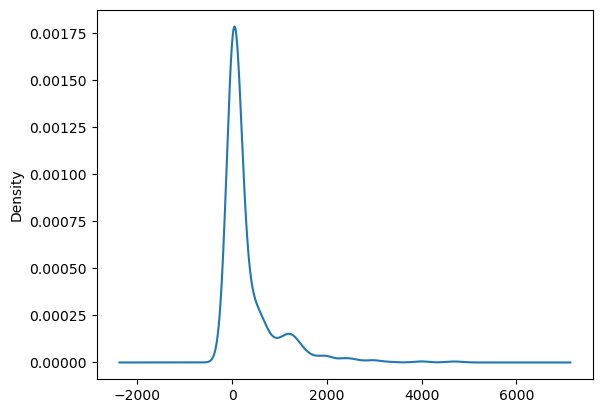

In [423]:
df["capacity_mw"].plot(kind='density')

<Axes: ylabel='Density'>

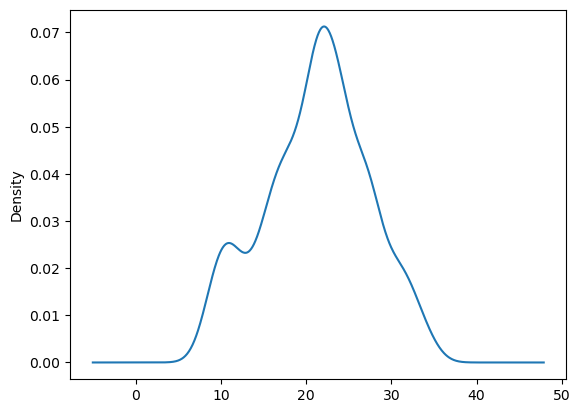

In [424]:
df["latitude"].plot(kind='density')

<Axes: ylabel='Density'>

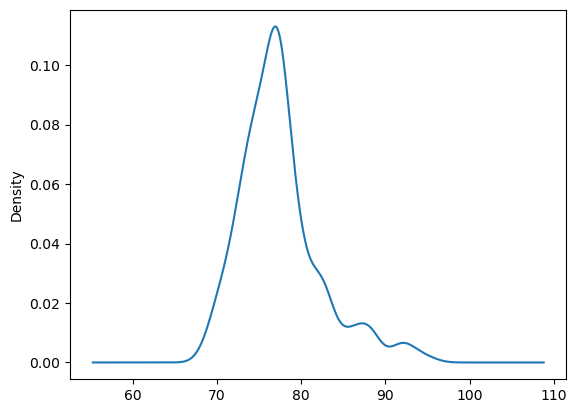

In [425]:
df["longitude"].plot(kind='density')

<Axes: ylabel='Density'>

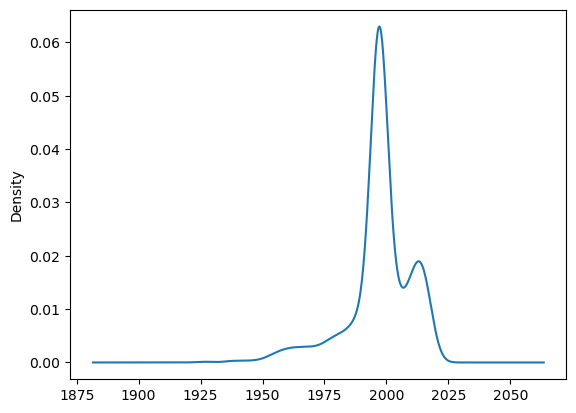

In [426]:
df["commissioning_year"].plot(kind='density')

<Axes: ylabel='Density'>

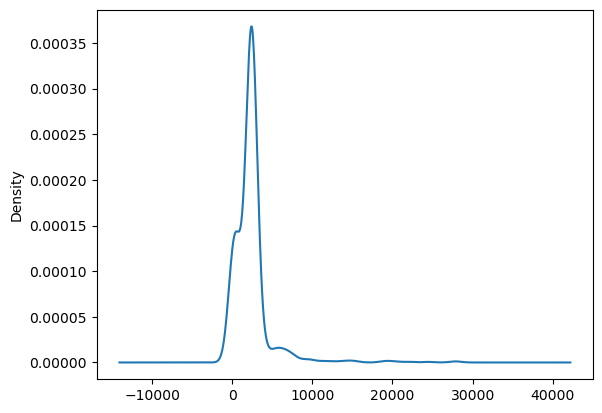

In [427]:
df["generation_gwh_2014"].plot(kind='density')

<Axes: ylabel='Density'>

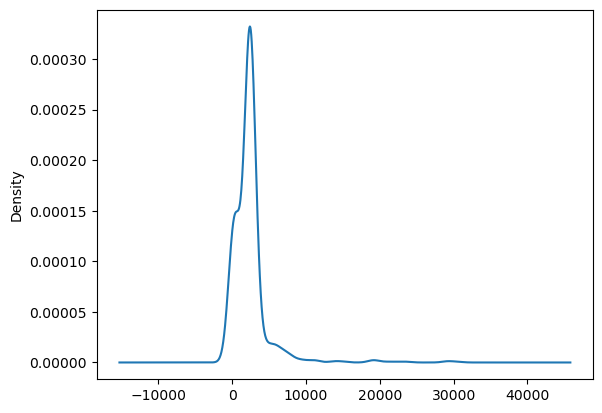

In [428]:
df["generation_gwh_2015"].plot(kind='density')

<Axes: ylabel='Density'>

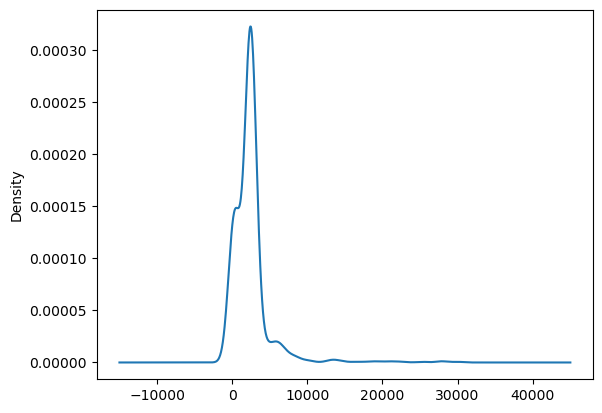

In [429]:
df["generation_gwh_2016"].plot(kind='density')

<Axes: ylabel='Density'>

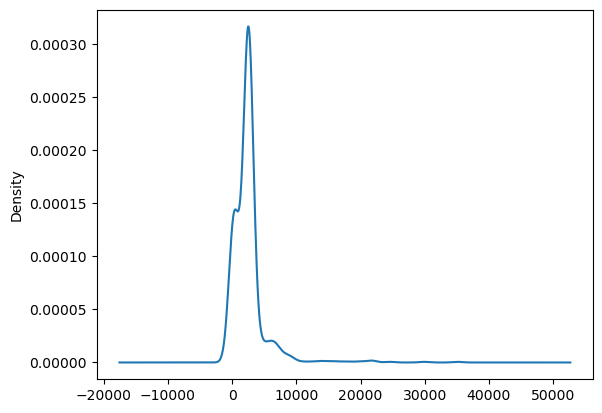

In [430]:
df["generation_gwh_2017"].plot(kind='density')

<Axes: ylabel='Density'>

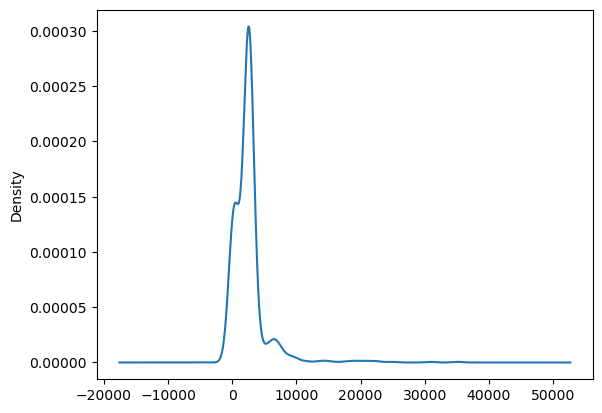

In [431]:
df["generation_gwh_2018"].plot(kind='density')

### Droping Columns which are not required

In [306]:
df.drop(['generation_data_source','generation_data_source','wepp_id'],axis=1, inplace=True)

In [307]:
df.drop(['country','country_long'],axis=1, inplace=True)

In [308]:
df.dtypes

name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
other_fuel1               object
commissioning_year       float64
owner                     object
source                    object
url                       object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

### Handling Null Values

In [309]:
df.isnull().sum()

name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
other_fuel1              709
commissioning_year       380
owner                    565
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [310]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")

In [311]:
l=['geolocation_source','primary_fuel','other_fuel1']

In [312]:
for i in l:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [313]:
df.drop(['url'],axis=1,inplace=True)

In [314]:
df['owner']=imp.fit_transform(df['owner'].values.reshape(-1,1))

In [315]:
df.isnull().sum()

name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
other_fuel1                0
commissioning_year       380
owner                      0
source                     0
geolocation_source         0
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [316]:
imp=SimpleImputer(missing_values=np.NaN,strategy="mean")

In [317]:
l=['latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
   'generation_gwh_2017','generation_gwh_2018']

In [318]:
for i in l:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [319]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
owner                    0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [320]:
df.drop(['name','gppd_idnr','year_of_capacity_data'],axis=1, inplace=True)

# Label Encoding 
Changing Categorical Columns to Numerical

In [321]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [322]:
from sklearn.preprocessing import LabelEncoder

In [323]:
le=LabelEncoder()

In [324]:
list=["primary_fuel","other_fuel1","owner","source"]
for i in list:
    df[i]=le.fit_transform(df[i])

In [325]:
df["geolocation_source"]=le.fit_transform(df["geolocation_source"])

### Box Plot - to identify the presence of Outliers

capacity_mw               Axes(0.125,0.747241;0.227941x0.132759)
latitude               Axes(0.398529,0.747241;0.227941x0.132759)
longitude              Axes(0.672059,0.747241;0.227941x0.132759)
primary_fuel              Axes(0.125,0.587931;0.227941x0.132759)
other_fuel1            Axes(0.398529,0.587931;0.227941x0.132759)
commissioning_year     Axes(0.672059,0.587931;0.227941x0.132759)
owner                     Axes(0.125,0.428621;0.227941x0.132759)
source                 Axes(0.398529,0.428621;0.227941x0.132759)
geolocation_source     Axes(0.672059,0.428621;0.227941x0.132759)
generation_gwh_2014        Axes(0.125,0.26931;0.227941x0.132759)
generation_gwh_2015     Axes(0.398529,0.26931;0.227941x0.132759)
generation_gwh_2016     Axes(0.672059,0.26931;0.227941x0.132759)
generation_gwh_2017           Axes(0.125,0.11;0.227941x0.132759)
generation_gwh_2018        Axes(0.398529,0.11;0.227941x0.132759)
dtype: object

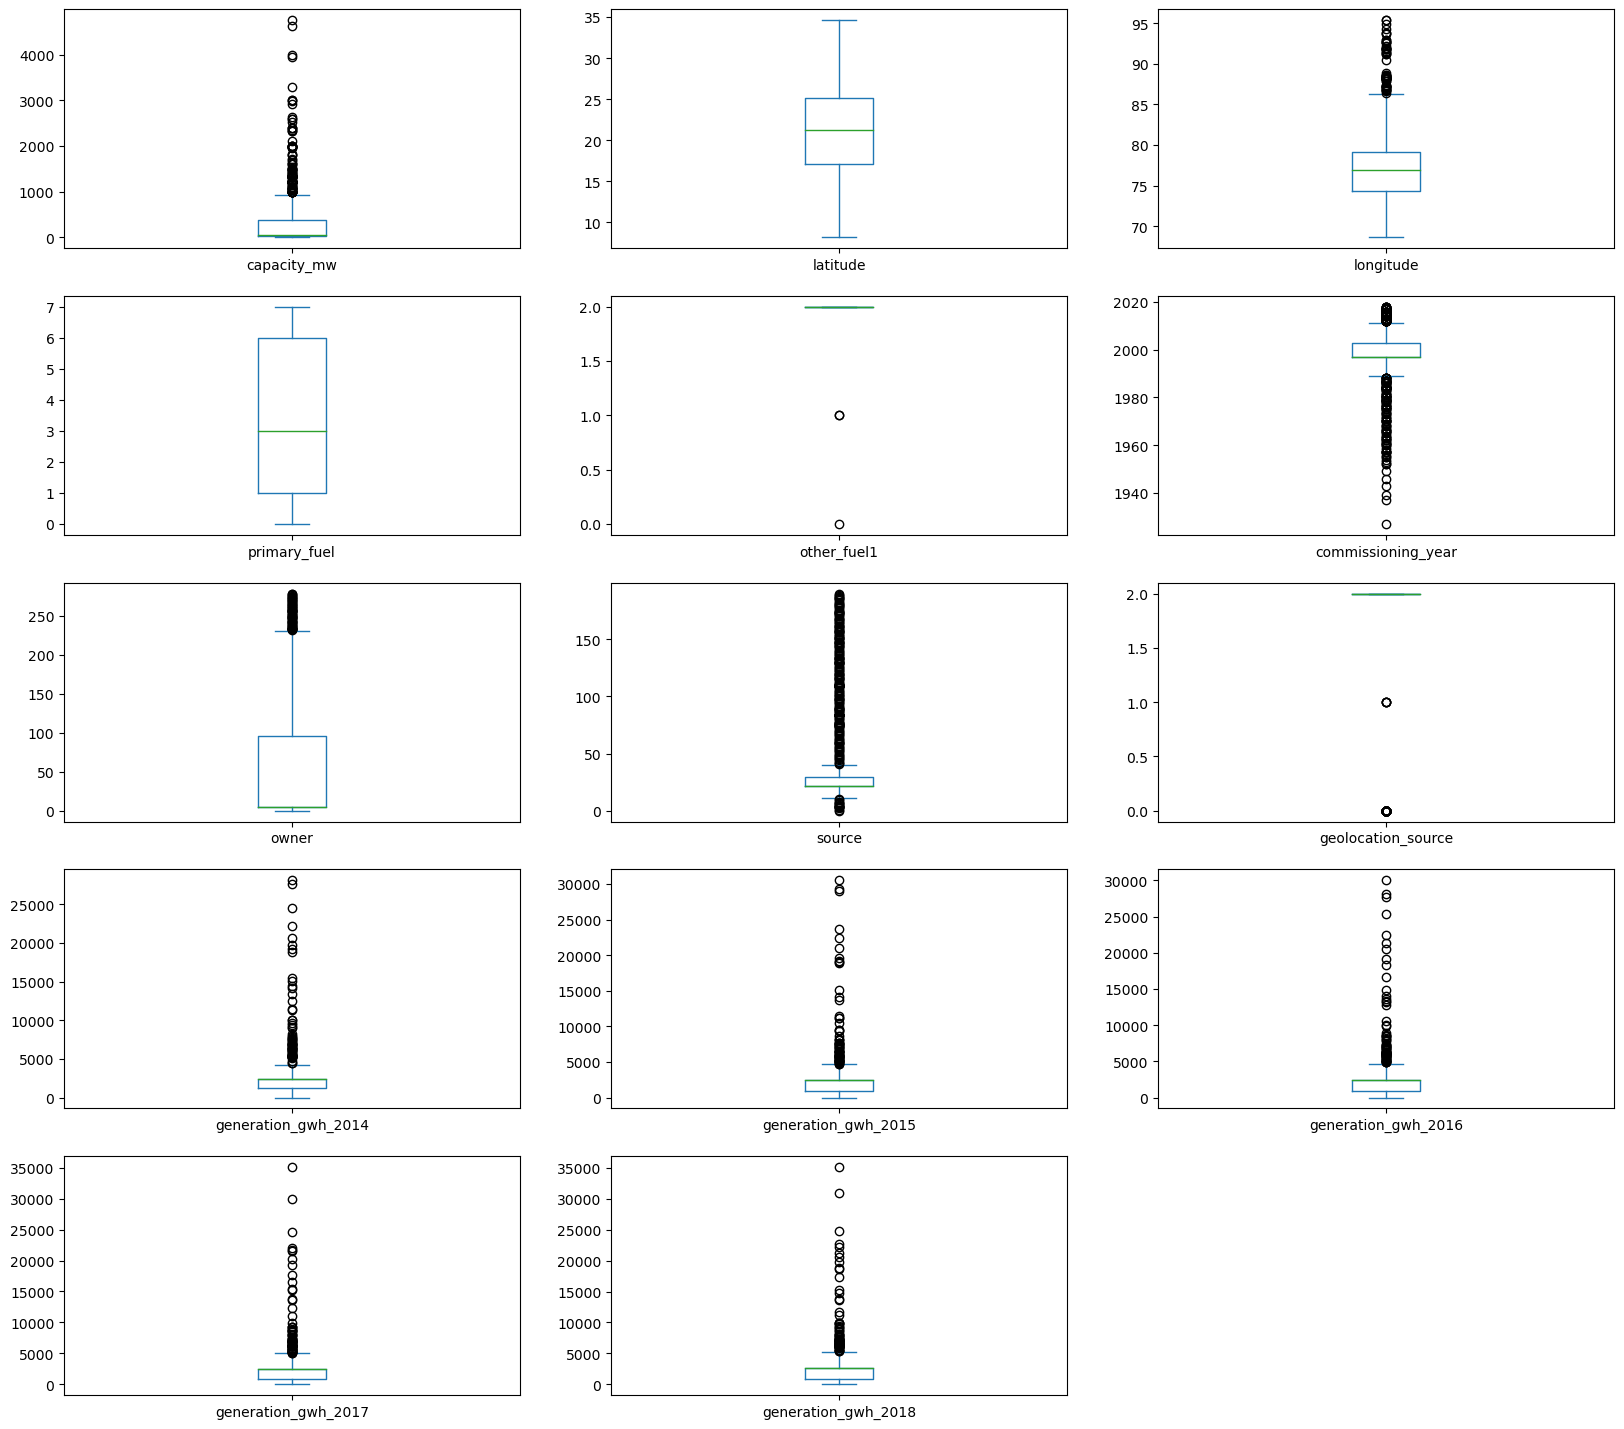

In [326]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(20,18))

We Can see the presence of Outliers

### Descriptive Ananlysis

In [327]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,1.995590,1997.091082,56.169791,43.847850,1.733186,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,2.280652,0.081259,13.016360,82.529116,44.642818,0.677151,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,2.000000,1997.091082,5.000000,22.000000,2.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,3.000000,2.000000,1997.091082,5.000000,22.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,6.000000,2.000000,2003.000000,95.500000,29.500000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


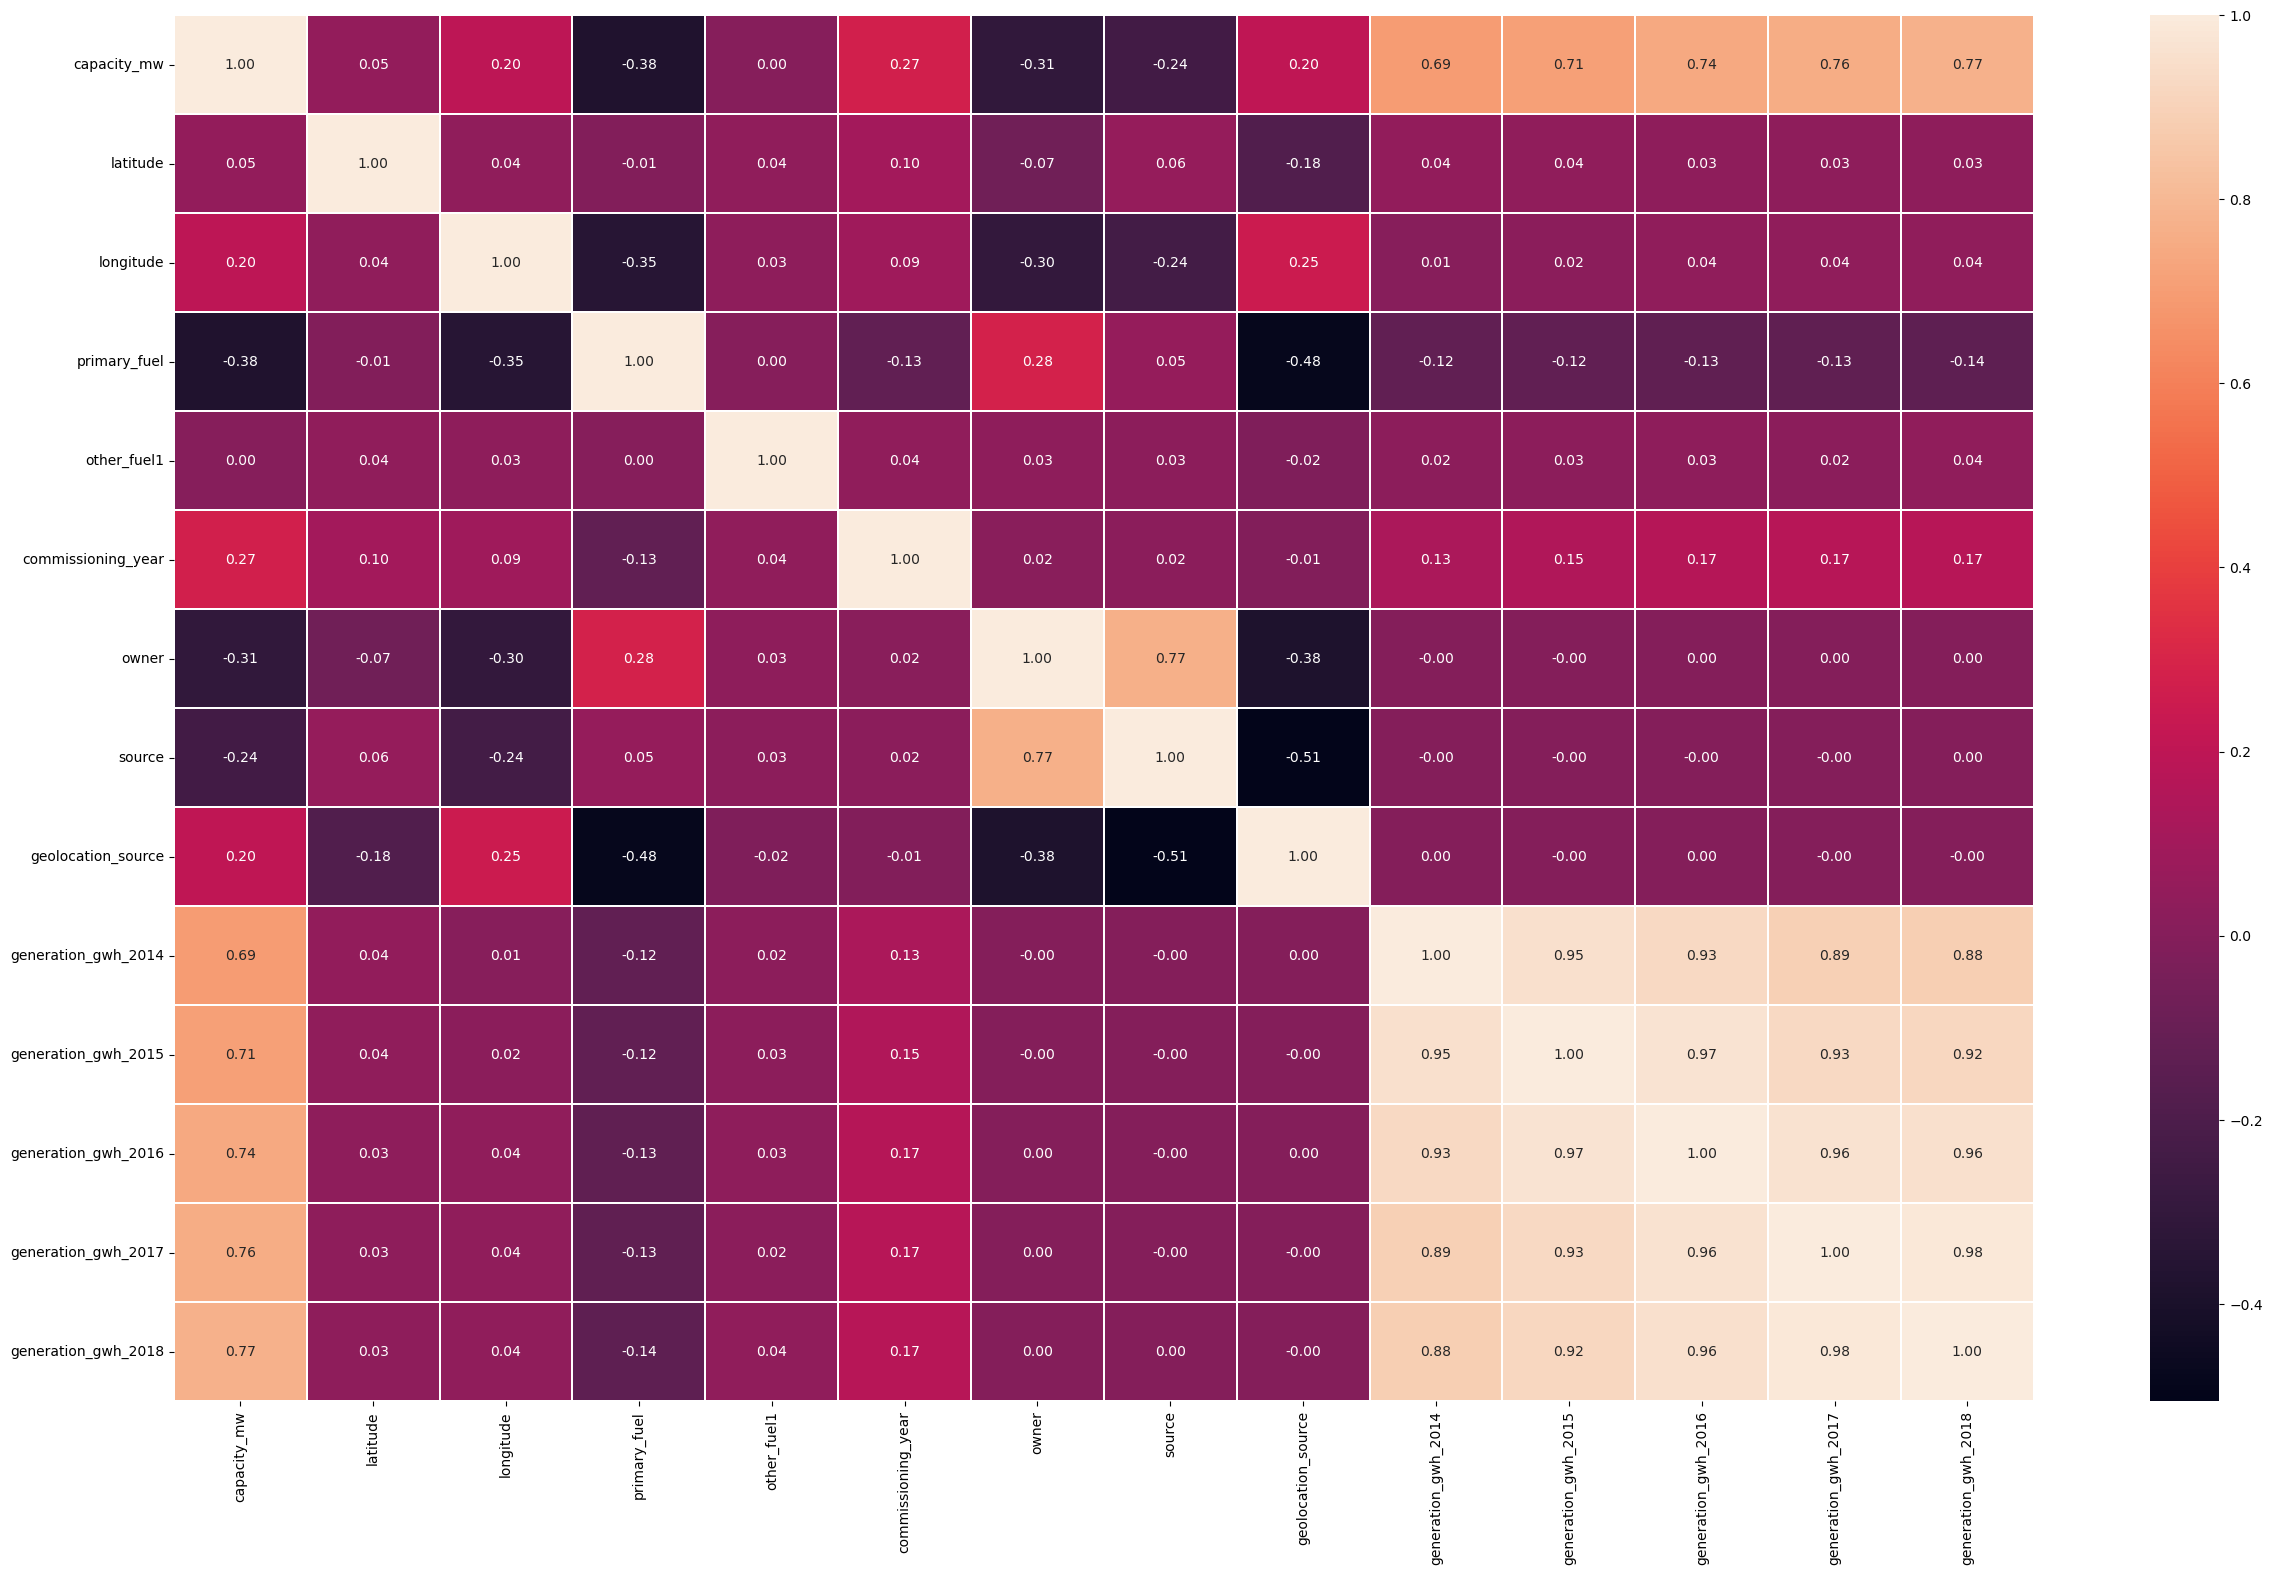

In [328]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

We can see the presence of Multicolinearity , Going to check Variance Inflation Factor

In [329]:
df.corr()["primary_fuel"].sort_values()

geolocation_source    -0.483217
capacity_mw           -0.380395
longitude             -0.347948
generation_gwh_2018   -0.136983
generation_gwh_2017   -0.132003
generation_gwh_2016   -0.131051
commissioning_year    -0.126650
generation_gwh_2015   -0.124828
generation_gwh_2014   -0.124769
latitude              -0.010204
other_fuel1            0.004912
source                 0.053613
owner                  0.284296
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

In [330]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [331]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["Variables"]=x1.columns
    vif["VIF factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [332]:
x=df.drop(["primary_fuel"],axis=1)
y=df["primary_fuel"]

After VIF Analysis droping few more Columns

In [335]:
x.drop(["generation_gwh_2016","generation_gwh_2018"],axis=1,inplace=True)

In [336]:
x.drop(["generation_gwh_2015"],axis=1,inplace=True)

In [337]:
dfn=df.drop(['generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],axis=1)

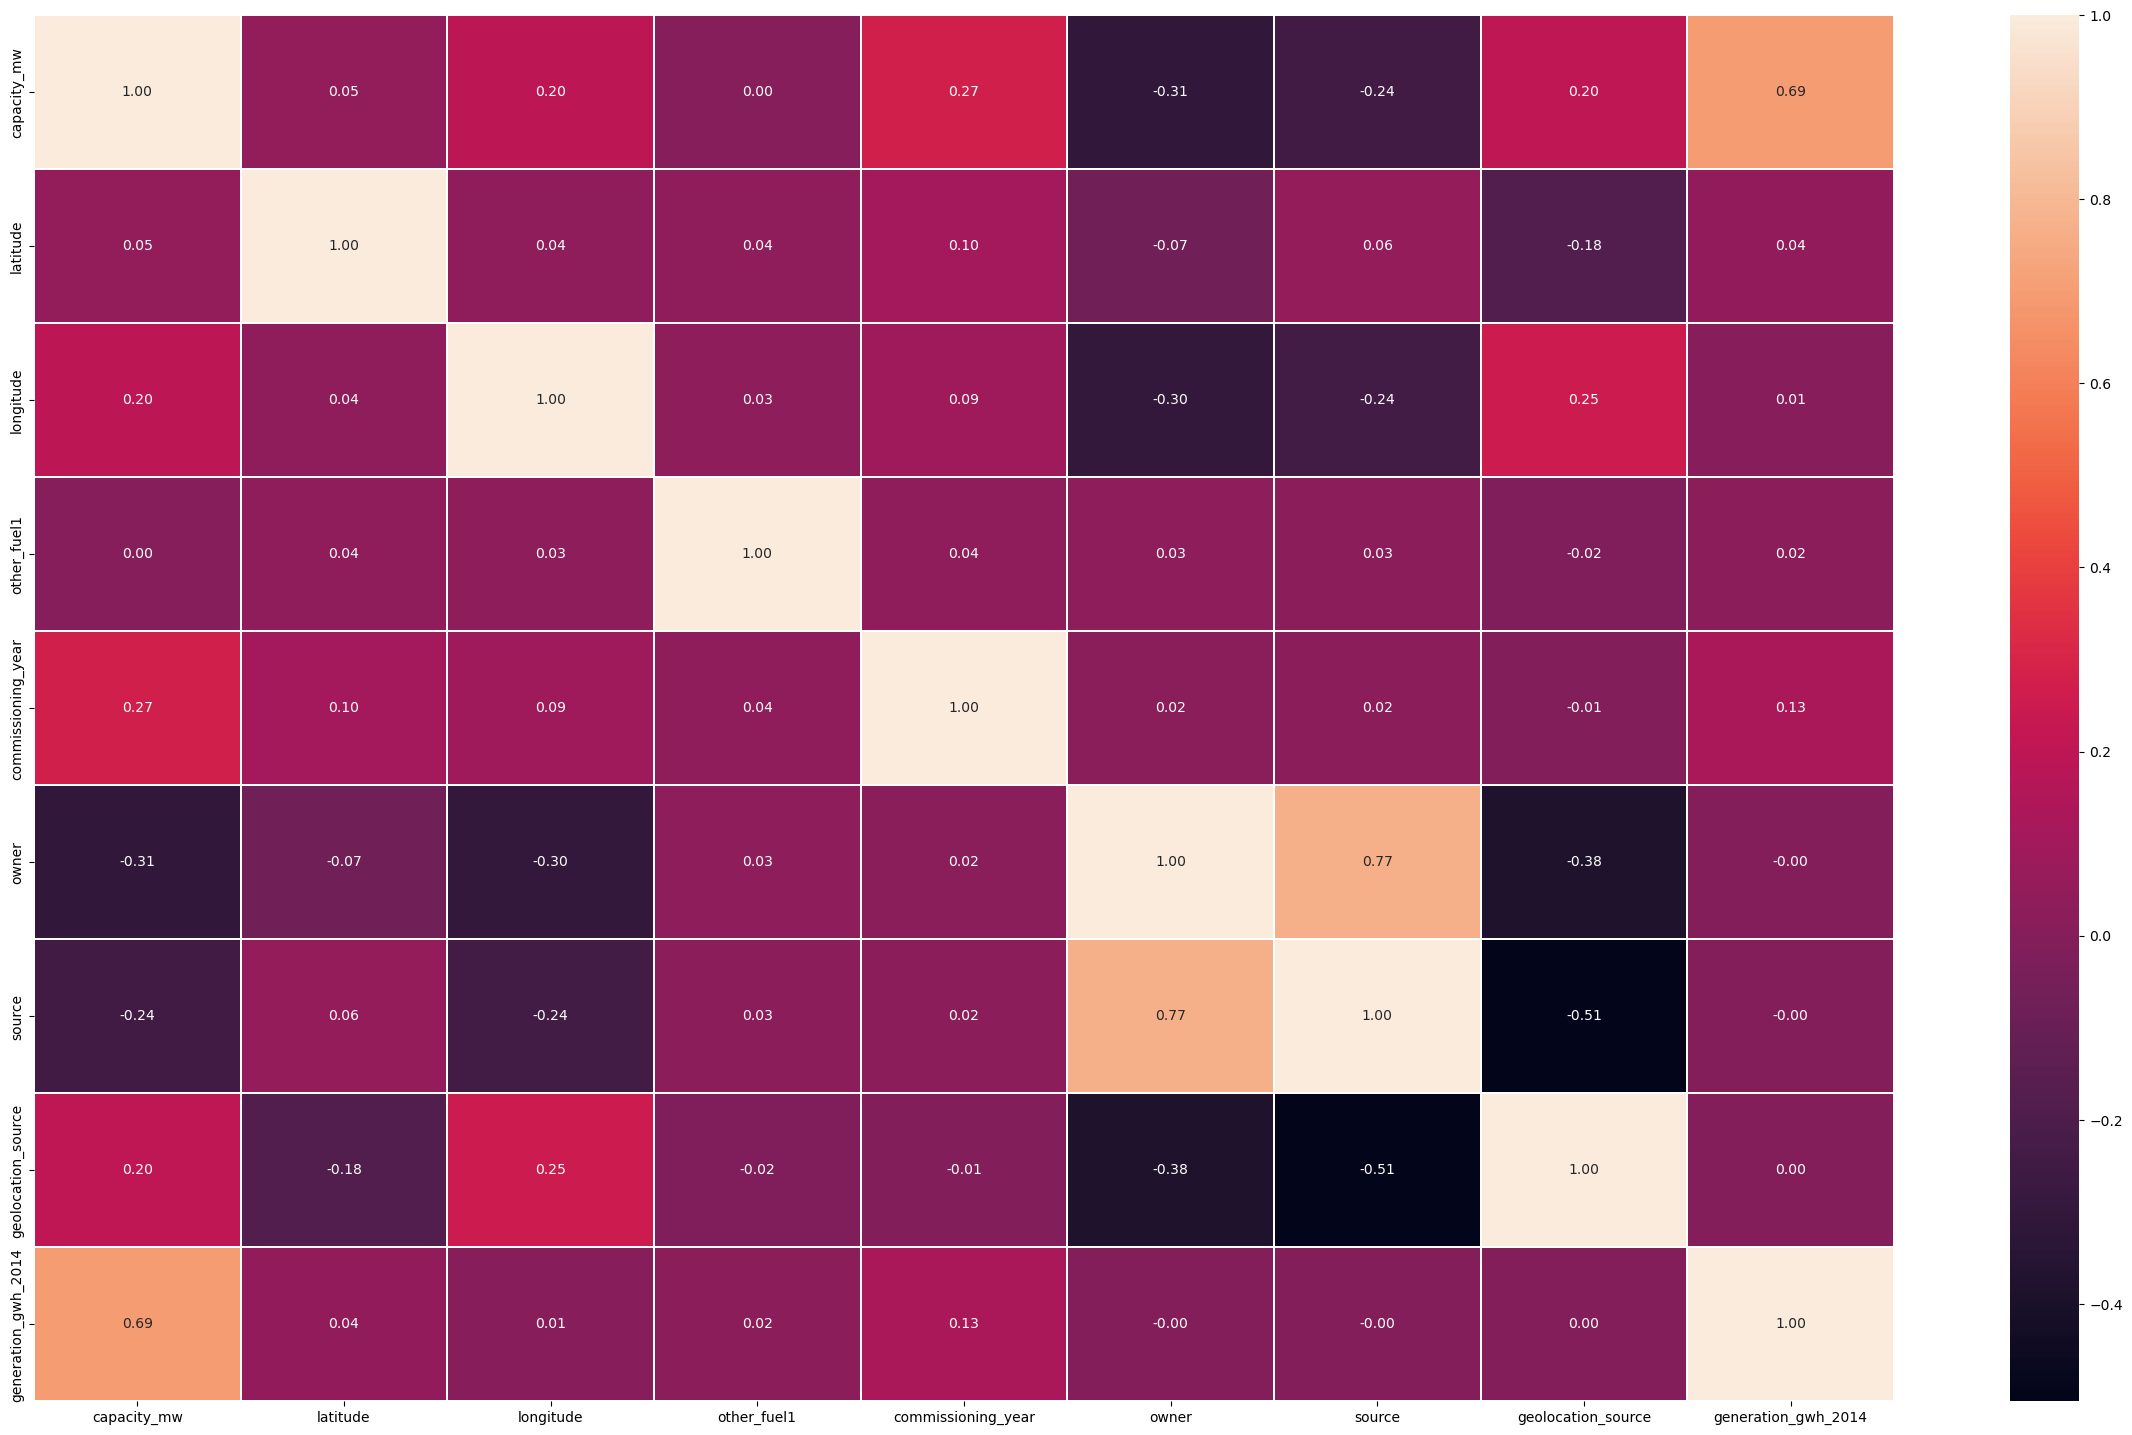

In [338]:
plt.figure(figsize=(30,18))
sns.heatmap(x.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

### Handling Outliers

In [339]:
from scipy.stats import zscore
z=np.abs(zscore(dfn))

In [340]:
np.where(z>3)

(array([ 15,  71,  80, 143, 143, 147, 158, 179, 183, 191, 209, 209, 222,
        244, 299, 308, 308, 321, 323, 333, 340, 342, 345, 360, 363, 364,
        364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493, 494,
        494, 499, 519, 538, 541, 546, 573, 577, 583, 592, 601, 621, 638,
        648, 648, 657, 657, 661, 669, 689, 695, 695, 706, 709, 721, 724,
        726, 726, 728, 767, 786, 786, 788, 807, 808, 808, 811, 813, 817,
        818, 832, 847, 848, 870, 871, 879, 880, 880, 895, 900], dtype=int64),
 array([0, 7, 7, 0, 9, 0, 9, 2, 2, 7, 0, 9, 5, 2, 7, 0, 9, 7, 2, 2, 2, 5,
        7, 2, 0, 0, 9, 5, 0, 2, 2, 5, 5, 5, 0, 5, 0, 9, 0, 9, 2, 2, 5, 5,
        2, 5, 2, 5, 5, 5, 5, 2, 0, 9, 0, 9, 7, 7, 7, 0, 9, 5, 5, 9, 9, 0,
        9, 5, 0, 0, 9, 0, 5, 0, 9, 4, 4, 4, 2, 7, 2, 5, 7, 7, 7, 0, 9, 7,
        7], dtype=int64))

In [341]:
dfnew=dfn[(z<3).all(axis=1)]

In [342]:
dfnew.shape

(831, 10)

About 8.3% Data Has been Lost (907 - 831) / 907 * 100

# Handling Skewness

In [343]:
dfnew.skew().sort_values()

geolocation_source    -2.098153
commissioning_year    -0.836352
latitude              -0.116001
other_fuel1            0.000000
primary_fuel           0.414888
longitude              0.907429
owner                  1.316648
generation_gwh_2014    1.524498
source                 1.778820
capacity_mw            1.951101
dtype: float64

In [344]:
from sklearn.preprocessing import power_transform

In [345]:
x=dfnew.drop(["primary_fuel"],axis=1)

In [346]:
y=dfnew["primary_fuel"]

In [347]:
x=power_transform(x,method='yeo-johnson')

In [348]:
dfnew.skew().sort_values()

geolocation_source    -2.098153
commissioning_year    -0.836352
latitude              -0.116001
other_fuel1            0.000000
primary_fuel           0.414888
longitude              0.907429
owner                  1.316648
generation_gwh_2014    1.524498
source                 1.778820
capacity_mw            1.951101
dtype: float64

In [349]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [350]:
dfx=sc.fit_transform(x)

In [351]:
dfx.mean()

-1.25881685369987e-17

A mean value of approximately -1.25881685369987e-17 after standard scaling is very close to zero, which is expected and desirable.
This small mean value means that the mean of data is very close to zero, which is a crucial aspect of standardization. It helps ensure that the features are on a similar scale, preventing certain features from dominating the model's learning process and contributing to potential numerical instability.

## Using Classification Model to Predict Primary Fuel

In [352]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [353]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

# KNeighbors Classifier

In [354]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
model_selection(knn)

at random state 0,  accuracy score is 0.804
at random state 0, confusion matrix is [[10  2  0  0  0  0  0  1]
 [ 3 56  3  3  0  0  0  3]
 [ 0  0 10  7  0  0  0  0]
 [ 0  9  3 57  0  0  0  3]
 [ 0  1  1  1  0  0  0  0]
 [ 0  0  3  2  0  0  0  1]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  3  0  0  0 34]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.82      0.82      0.82        68
           2       0.50      0.59      0.54        17
           3       0.78      0.79      0.79        72
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00        34
           7       0.81      0.92      0.86        37

    accuracy                           0.80       250
   macro avg       0.59      0.61      0.60       250
weighted avg       0.78      0.80      0.79       250



at 

at random state 9,  accuracy score is 0.8
at random state 9, confusion matrix is [[ 6  1  0  0  0  0  0  0]
 [ 3 59  1  4  0  0  0  1]
 [ 0  4  6  7  0  1  0  1]
 [ 0  8  1 54  0  0  0  4]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  4  3  0  1  0  1]
 [ 0  0  0  0  0  0 42  0]
 [ 0  1  0  2  0  0  0 32]]
at random state 9, classification report is               precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.78      0.87      0.82        68
           2       0.50      0.32      0.39        19
           3       0.77      0.81      0.79        67
           4       0.00      0.00      0.00         2
           5       0.50      0.10      0.17        10
           6       1.00      1.00      1.00        42
           7       0.82      0.91      0.86        35

    accuracy                           0.80       250
   macro avg       0.63      0.61      0.60       250
weighted avg       0.78      0.80      0.78       250



at ra

at random state 19,  accuracy score is 0.784
at random state 19, confusion matrix is [[11  4  0  0  0  0  0  1]
 [ 3 64  2  5  0  0  0  2]
 [ 0  8  4  5  0  1  0  0]
 [ 0 11  1 58  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 1  1  1  1  0  1  0  0]
 [ 0  2  0  0  0  0 28  0]
 [ 0  0  0  2  0  0  0 30]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       0.69      0.84      0.76        76
           2       0.50      0.22      0.31        18
           3       0.82      0.83      0.82        70
           4       0.00      0.00      0.00         3
           5       0.50      0.20      0.29         5
           6       1.00      0.93      0.97        30
           7       0.91      0.94      0.92        32

    accuracy                           0.78       250
   macro avg       0.64      0.58      0.60       250
weighted avg       0.77      0.78      0.77       250





at random state 31,  accuracy score is 0.852
at random state 31, confusion matrix is [[10  2  0  0  0  0  0  1]
 [ 4 66  1  2  0  0  0  1]
 [ 0  7  8  3  0  3  0  1]
 [ 0  3  1 60  0  0  0  2]
 [ 0  2  1  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  1]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  1  0  0  0 31]]
at random state 31, classification report is               precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.82      0.89      0.86        74
           2       0.73      0.36      0.48        22
           3       0.90      0.91      0.90        66
           4       0.00      0.00      0.00         3
           5       0.25      0.33      0.29         3
           6       1.00      1.00      1.00        37
           7       0.84      0.97      0.90        32

    accuracy                           0.85       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.84      0.85      0.84       250





at random state 43,  accuracy score is 0.8
at random state 43, confusion matrix is [[13  2  0  0  0  0  0  0]
 [ 1 52  3  1  0  0  0  2]
 [ 0  5  9  3  0  0  0  0]
 [ 0  9  3 54  0  0  0  6]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  2  2  0  1  0  1]
 [ 0  2  0  0  0  0 37  0]
 [ 3  0  0  4  0  0  0 34]]
at random state 43, classification report is               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.73      0.88      0.80        59
           2       0.53      0.53      0.53        17
           3       0.84      0.75      0.79        72
           4       0.00      0.00      0.00         1
           5       1.00      0.17      0.29         6
           6       1.00      0.95      0.97        39
           7       0.79      0.83      0.81        41

    accuracy                           0.80       250
   macro avg       0.71      0.62      0.63       250
weighted avg       0.81      0.80      0.79       250



at

at random state 55,  accuracy score is 0.788
at random state 55, confusion matrix is [[12  3  0  0  0  0  0  0]
 [ 4 51  2  4  0  0  0  5]
 [ 0  4 14  3  0  4  0  2]
 [ 0  2  3 49  0  1  0  3]
 [ 0  1  0  1  0  0  0  0]
 [ 2  0  1  0  0  1  0  1]
 [ 1  2  0  0  0  0 40  0]
 [ 0  1  0  3  0  0  0 30]]
at random state 55, classification report is               precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.80      0.77      0.78        66
           2       0.70      0.52      0.60        27
           3       0.82      0.84      0.83        58
           4       0.00      0.00      0.00         2
           5       0.17      0.20      0.18         5
           6       1.00      0.93      0.96        43
           7       0.73      0.88      0.80        34

    accuracy                           0.79       250
   macro avg       0.61      0.62      0.61       250
weighted avg       0.79      0.79      0.78       250





at random state 67,  accuracy score is 0.796
at random state 67, confusion matrix is [[16  2  0  0  0  0  0  0]
 [ 8 46  5  2  0  0  0  0]
 [ 1  6  7  4  0  1  0  0]
 [ 0  6  1 62  0  2  0  0]
 [ 0  3  0  1  0  0  0  0]
 [ 0  0  4  2  0  1  0  0]
 [ 0  0  0  0  0  0 36  0]
 [ 0  0  0  3  0  0  0 31]]
at random state 67, classification report is               precision    recall  f1-score   support

           0       0.64      0.89      0.74        18
           1       0.73      0.75      0.74        61
           2       0.41      0.37      0.39        19
           3       0.84      0.87      0.86        71
           4       0.00      0.00      0.00         4
           5       0.25      0.14      0.18         7
           6       1.00      1.00      1.00        36
           7       1.00      0.91      0.95        34

    accuracy                           0.80       250
   macro avg       0.61      0.62      0.61       250
weighted avg       0.78      0.80      0.79       250





at random state 78,  accuracy score is 0.768
at random state 78, confusion matrix is [[ 8  2  0  0  0  0  0  0]
 [ 8 56  2  2  0  0  0  4]
 [ 1  5  7  3  0  2  0  2]
 [ 0  6  3 56  0  0  0  3]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  2  5  0  0  0  1]
 [ 0  1  0  0  0  0 33  0]
 [ 1  0  0  3  0  0  0 32]]
at random state 78, classification report is               precision    recall  f1-score   support

           0       0.44      0.80      0.57        10
           1       0.78      0.78      0.78        72
           2       0.50      0.35      0.41        20
           3       0.81      0.82      0.82        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         8
           6       1.00      0.97      0.99        34
           7       0.76      0.89      0.82        36

    accuracy                           0.77       250
   macro avg       0.54      0.58      0.55       250
weighted avg       0.75      0.77      0.75       250





at random state 89,  accuracy score is 0.764
at random state 89, confusion matrix is [[ 9  4  0  0  0  0  0  0]
 [ 3 53  2  6  0  0  0  1]
 [ 0  9  9  7  0  0  0  0]
 [ 0  8  2 60  0  0  0  4]
 [ 0  3  0  1  0  0  0  0]
 [ 0  0  2  3  0  0  0  0]
 [ 1  1  0  0  0  0 34  0]
 [ 0  1  0  1  0  0  0 26]]
at random state 89, classification report is               precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.67      0.82      0.74        65
           2       0.60      0.36      0.45        25
           3       0.77      0.81      0.79        74
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       1.00      0.94      0.97        36
           7       0.84      0.93      0.88        28

    accuracy                           0.76       250
   macro avg       0.57      0.57      0.57       250
weighted avg       0.74      0.76      0.74       250





# CV  Score

In [355]:
score=cross_val_score(knn,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80239521 0.86144578 0.81325301 0.78915663 0.8253012 ]
0.8183103672173726
0.024650945612358706


## Logistic Regression

In [356]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_selection(lr)

at random state 0,  accuracy score is 0.668
at random state 0, confusion matrix is [[ 5  1  0  0  0  0  0  7]
 [ 4 47  3  8  0  0  0  6]
 [ 0  1  6 10  0  0  0  0]
 [ 0 11  5 51  0  0  0  5]
 [ 0  2  0  1  0  0  0  0]
 [ 2  0  0  3  0  0  0  1]
 [ 0  1  0  0  0  0 33  0]
 [ 0  4  0  8  0  0  0 25]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.45      0.38      0.42        13
           1       0.70      0.69      0.70        68
           2       0.43      0.35      0.39        17
           3       0.63      0.71      0.67        72
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       1.00      0.97      0.99        34
           7       0.57      0.68      0.62        37

    accuracy                           0.67       250
   macro avg       0.47      0.47      0.47       250
weighted avg       0.65      0.67      0.65       250



at 

at random state 12,  accuracy score is 0.656
at random state 12, confusion matrix is [[12  1  0  0  0  0  0  2]
 [ 7 44  2  5  0  0  0  4]
 [ 2  8  3  8  0  0  0  0]
 [ 0 16  2 45  0  0  0  3]
 [ 0  3  0  1  0  0  0  0]
 [ 2  1  0  5  0  0  0  0]
 [ 0  1  0  1  0  0 36  0]
 [ 0  6  0  6  0  0  0 24]]
at random state 12, classification report is               precision    recall  f1-score   support

           0       0.52      0.80      0.63        15
           1       0.55      0.71      0.62        62
           2       0.43      0.14      0.21        21
           3       0.63      0.68      0.66        66
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           6       1.00      0.95      0.97        38
           7       0.73      0.67      0.70        36

    accuracy                           0.66       250
   macro avg       0.48      0.49      0.47       250
weighted avg       0.63      0.66      0.63       250





at random state 21,  accuracy score is 0.704
at random state 21, confusion matrix is [[ 9  3  0  0  0  0  0  5]
 [ 5 49  4  7  0  0  0  5]
 [ 1  3  6  5  0  0  0  0]
 [ 0 11  5 52  0  0  0  7]
 [ 0  3  0  0  0  0  0  0]
 [ 2  0  0  3  0  0  0  0]
 [ 0  1  0  0  0  0 33  1]
 [ 0  1  0  2  0  0  0 27]]
at random state 21, classification report is               precision    recall  f1-score   support

           0       0.53      0.53      0.53        17
           1       0.69      0.70      0.70        70
           2       0.40      0.40      0.40        15
           3       0.75      0.69      0.72        75
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       1.00      0.94      0.97        35
           7       0.60      0.90      0.72        30

    accuracy                           0.70       250
   macro avg       0.50      0.52      0.50       250
weighted avg       0.69      0.70      0.69       250





at random state 30,  accuracy score is 0.688
at random state 30, confusion matrix is [[ 9  1  0  0  0  0  0  4]
 [ 4 56  2  8  0  0  0  4]
 [ 0  8  3  8  0  1  0  1]
 [ 0  8  4 50  1  0  0  4]
 [ 0  1  1  1  0  0  0  0]
 [ 1  2  0  2  0  0  0  1]
 [ 0  1  0  0  0  0 30  0]
 [ 0  3  0  7  0  0  0 24]]
at random state 30, classification report is               precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.70      0.76      0.73        74
           2       0.30      0.14      0.19        21
           3       0.66      0.75      0.70        67
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       1.00      0.97      0.98        31
           7       0.63      0.71      0.67        34

    accuracy                           0.69       250
   macro avg       0.49      0.50      0.49       250
weighted avg       0.65      0.69      0.67       250





at random state 40,  accuracy score is 0.68
at random state 40, confusion matrix is [[10  3  0  0  0  0  0  5]
 [ 1 48  2  8  0  0  0  5]
 [ 0  6  2  9  0  0  0  1]
 [ 0  8  3 47  0  0  0  3]
 [ 0  2  0  2  0  0  0  0]
 [ 1  1  0  4  0  0  0  2]
 [ 0  2  0  0  0  0 39  0]
 [ 0  2  0 10  0  0  0 24]]
at random state 40, classification report is               precision    recall  f1-score   support

           0       0.83      0.56      0.67        18
           1       0.67      0.75      0.71        64
           2       0.29      0.11      0.16        18
           3       0.59      0.77      0.67        61
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           6       1.00      0.95      0.97        41
           7       0.60      0.67      0.63        36

    accuracy                           0.68       250
   macro avg       0.50      0.48      0.48       250
weighted avg       0.64      0.68      0.65       250



a

at random state 49,  accuracy score is 0.656
at random state 49, confusion matrix is [[ 8  4  0  0  0  0  0  6]
 [ 2 49  3 11  1  0  0  3]
 [ 0  4  3  8  0  0  0  0]
 [ 0 14  5 51  0  0  0  3]
 [ 0  1  0  0  0  0  0  0]
 [ 1  1  0  4  0  0  0  0]
 [ 0  1  0  1  0  0 29  0]
 [ 0  2  0 11  0  0  0 24]]
at random state 49, classification report is               precision    recall  f1-score   support

           0       0.73      0.44      0.55        18
           1       0.64      0.71      0.68        69
           2       0.27      0.20      0.23        15
           3       0.59      0.70      0.64        73
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       1.00      0.94      0.97        31
           7       0.67      0.65      0.66        37

    accuracy                           0.66       250
   macro avg       0.49      0.45      0.47       250
weighted avg       0.64      0.66      0.64       250





at random state 57, classification report is               precision    recall  f1-score   support

           0       0.45      0.64      0.53        14
           1       0.69      0.71      0.70        65
           2       0.67      0.30      0.41        20
           3       0.68      0.75      0.71        64
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       1.00      0.91      0.95        33
           7       0.70      0.82      0.76        45

    accuracy                           0.70       250
   macro avg       0.52      0.52      0.51       250
weighted avg       0.69      0.70      0.69       250



at random state 58,  accuracy score is 0.668
at random state 58, confusion matrix is [[12  0  0  0  0  0  0  6]
 [ 5 53  4 11  0  0  0  4]
 [ 0  6  2  8  0  0  0  1]
 [ 0 11  1 58  0  0  0  6]
 [ 0  1  1  1  0  0  0  0]
 [ 4  0  0  2  0  0  0  2]
 [ 0  0  0  0  0  0 21  0]
 [ 0  1  0  8  0  0  0 21]]


at random state 67,  accuracy score is 0.7
at random state 67, confusion matrix is [[15  1  0  0  0  0  0  2]
 [ 6 43  5  4  0  0  0  3]
 [ 1  4  5  8  0  0  0  1]
 [ 0 10  4 53  0  0  0  4]
 [ 0  3  0  1  0  0  0  0]
 [ 2  2  0  3  0  0  0  0]
 [ 0  0  0  0  0  0 36  0]
 [ 0  1  0 10  0  0  0 23]]
at random state 67, classification report is               precision    recall  f1-score   support

           0       0.62      0.83      0.71        18
           1       0.67      0.70      0.69        61
           2       0.36      0.26      0.30        19
           3       0.67      0.75      0.71        71
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         7
           6       1.00      1.00      1.00        36
           7       0.70      0.68      0.69        34

    accuracy                           0.70       250
   macro avg       0.50      0.53      0.51       250
weighted avg       0.67      0.70      0.68       250



at

at random state 76, classification report is               precision    recall  f1-score   support

           0       0.29      0.42      0.34        12
           1       0.66      0.75      0.70        71
           2       0.64      0.28      0.39        25
           3       0.62      0.67      0.64        58
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         8
           6       1.00      0.93      0.96        43
           7       0.63      0.73      0.68        33

    accuracy                           0.67       250
   macro avg       0.48      0.47      0.47       250
weighted avg       0.66      0.67      0.66       250



at random state 77,  accuracy score is 0.704
at random state 77, confusion matrix is [[ 8  0  0  0  0  0  0  4]
 [ 4 46  2 10  0  0  0  3]
 [ 0  5  5  6  0  0  0  1]
 [ 0  7  4 55  0  0  0  5]
 [ 0  0  1  1  0  0  0  0]
 [ 2  1  0  2  0  0  0  2]
 [ 0  2  0  0  0  0 31  1]
 [ 0  3  0  8  0  0  0 31]]


at random state 85,  accuracy score is 0.696
at random state 85, confusion matrix is [[ 7  2  0  0  0  0  0  3]
 [ 3 47  1  6  0  0  0  5]
 [ 0  5  3 13  0  0  0  1]
 [ 0 14  0 63  0  0  0  5]
 [ 0  2  0  0  0  0  0  0]
 [ 1  2  0  1  0  0  0  1]
 [ 0  1  0  0  0  0 31  0]
 [ 0  4  0  6  0  0  0 23]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.61      0.76      0.68        62
           2       0.75      0.14      0.23        22
           3       0.71      0.77      0.74        82
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       1.00      0.97      0.98        32
           7       0.61      0.70      0.65        33

    accuracy                           0.70       250
   macro avg       0.54      0.49      0.49       250
weighted avg       0.69      0.70      0.67       250





at random state 94,  accuracy score is 0.696
at random state 94, confusion matrix is [[ 9  1  0  0  0  0  0  3]
 [ 5 51  2  8  0  0  0  8]
 [ 2  4  5 11  0  0  0  0]
 [ 0  6  3 50  0  1  0  6]
 [ 0  2  0  2  0  0  0  0]
 [ 1  0  0  0  0  0  0  1]
 [ 0  2  0  0  0  0 28  0]
 [ 0  1  0  7  0  0  0 31]]
at random state 94, classification report is               precision    recall  f1-score   support

           0       0.53      0.69      0.60        13
           1       0.76      0.69      0.72        74
           2       0.50      0.23      0.31        22
           3       0.64      0.76      0.69        66
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       1.00      0.93      0.97        30
           7       0.63      0.79      0.70        39

    accuracy                           0.70       250
   macro avg       0.51      0.51      0.50       250
weighted avg       0.68      0.70      0.68       250





# CV Score

In [357]:
score=cross_val_score(lr,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.68263473 0.72891566 0.68674699 0.69879518 0.69879518]
0.699177548517423
0.01620389771075986


## Decision Tree Classifier

In [358]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.832
at random state 0, confusion matrix is [[ 5  8  0  0  0  0  0  0]
 [ 1 53  7  5  1  0  0  1]
 [ 0  0 13  3  0  1  0  0]
 [ 0  6  1 63  0  2  0  0]
 [ 0  1  1  0  1  0  0  0]
 [ 0  1  1  2  0  2  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 37]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.83      0.38      0.53        13
           1       0.77      0.78      0.77        68
           2       0.57      0.76      0.65        17
           3       0.86      0.88      0.87        72
           4       0.50      0.33      0.40         3
           5       0.40      0.33      0.36         6
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.99        37

    accuracy                           0.83       250
   macro avg       0.74      0.68      0.70       250
weighted avg       0.83      0.83      0.83       250



at 

at random state 16,  accuracy score is 0.792
at random state 16, confusion matrix is [[12  3  0  0  0  0  0  0]
 [ 4 46  2  6  0  2  0  0]
 [ 0  5  8  5  0  3  0  0]
 [ 0  7  1 56  2  4  0  0]
 [ 0  4  0  1  0  0  0  0]
 [ 0  0  1  2  0  2  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 44]]
at random state 16, classification report is               precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.71      0.77      0.74        60
           2       0.67      0.38      0.48        21
           3       0.80      0.80      0.80        70
           4       0.00      0.00      0.00         5
           5       0.18      0.40      0.25         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        44

    accuracy                           0.79       250
   macro avg       0.64      0.64      0.63       250
weighted avg       0.79      0.79      0.79       250





at random state 26,  accuracy score is 0.768
at random state 26, confusion matrix is [[ 9  3  1  0  0  0  0  0]
 [ 4 48 10  7  5  1  0  1]
 [ 0  3  9  3  0  1  0  0]
 [ 0  6  5 51  0  3  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  1  1  0  1  0  0]
 [ 0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0 35]]
at random state 26, classification report is               precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.77      0.63      0.70        76
           2       0.35      0.56      0.43        16
           3       0.81      0.78      0.80        65
           4       0.00      0.00      0.00         2
           5       0.17      0.25      0.20         4
           6       1.00      1.00      1.00        39
           7       0.97      1.00      0.99        35

    accuracy                           0.77       250
   macro avg       0.60      0.62      0.60       250
weighted avg       0.80      0.77      0.78       250





at random state 35, classification report is               precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.76      0.71      0.74        70
           2       0.22      0.19      0.21        21
           3       0.75      0.85      0.80        65
           4       0.00      0.00      0.00         3
           5       0.14      0.17      0.15         6
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        39

    accuracy                           0.76       250
   macro avg       0.58      0.57      0.57       250
weighted avg       0.76      0.76      0.76       250



at random state 36,  accuracy score is 0.816
at random state 36, confusion matrix is [[ 8  3  0  0  0  0  0  0]
 [ 3 52  5  8  2  0  0  0]
 [ 0  2 10  2  0  3  0  0]
 [ 0  6  5 56  1  1  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  1  1  0  1  0  0]
 [ 0  1  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0 41]]


at random state 45,  accuracy score is 0.776
at random state 45, confusion matrix is [[13  5  0  0  0  2  0  0]
 [ 4 41  3  8  2  1  0  0]
 [ 0  3 14  5  0  2  0  0]
 [ 0  8  4 61  0  3  0  0]
 [ 0  3  0  1  0  0  0  0]
 [ 0  0  1  1  0  4  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 26]]
at random state 45, classification report is               precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.68      0.69      0.69        59
           2       0.64      0.58      0.61        24
           3       0.80      0.80      0.80        76
           4       0.00      0.00      0.00         4
           5       0.33      0.67      0.44         6
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        26

    accuracy                           0.78       250
   macro avg       0.65      0.67      0.66       250
weighted avg       0.78      0.78      0.78       250





at random state 62, classification report is               precision    recall  f1-score   support

           0       0.64      0.56      0.60        16
           1       0.75      0.70      0.72        73
           2       0.47      0.42      0.44        19
           3       0.78      0.84      0.81        69
           4       0.00      0.00      0.00         1
           5       0.17      0.50      0.25         2
           6       1.00      0.97      0.99        38
           7       0.97      1.00      0.98        32

    accuracy                           0.78       250
   macro avg       0.60      0.62      0.60       250
weighted avg       0.79      0.78      0.79       250



at random state 63,  accuracy score is 0.808
at random state 63, confusion matrix is [[ 7  4  0  0  0  0  0  0]
 [ 5 49  5  6  0  0  0  0]
 [ 0  1  8  3  0  1  0  0]
 [ 0  9  5 57  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  1  1  2  0  4  0  0]
 [ 0  0  1  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 43]]


at random state 72, classification report is               precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.72      0.81      0.76        72
           2       0.21      0.16      0.18        19
           3       0.82      0.79      0.81        76
           4       1.00      0.50      0.67         2
           5       0.22      0.67      0.33         3
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        30

    accuracy                           0.78       250
   macro avg       0.75      0.70      0.69       250
weighted avg       0.80      0.78      0.78       250



at random state 73,  accuracy score is 0.776
at random state 73, confusion matrix is [[14  4  0  0  0  0  0  0]
 [ 4 40  4  9  3  1  0  0]
 [ 0  6  7  4  0  2  0  0]
 [ 0  9  1 53  1  1  0  0]
 [ 0  4  0  1  0  0  0  0]
 [ 0  1  0  1  0  1  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 36]]


at random state 83,  accuracy score is 0.82
at random state 83, confusion matrix is [[ 8  5  0  0  0  0  0  0]
 [ 1 58  3  5  3  1  0  0]
 [ 0  3 11  3  1  0  0  0]
 [ 0  9  3 50  0  1  0  0]
 [ 0  2  2  0  0  0  0  0]
 [ 0  0  1  2  0  2  0  0]
 [ 0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0 40]]
at random state 83, classification report is               precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.75      0.82      0.78        71
           2       0.55      0.61      0.58        18
           3       0.83      0.79      0.81        63
           4       0.00      0.00      0.00         4
           5       0.50      0.40      0.44         5
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        40

    accuracy                           0.82       250
   macro avg       0.69      0.65      0.67       250
weighted avg       0.82      0.82      0.82       250



a

at random state 93,  accuracy score is 0.78
at random state 93, confusion matrix is [[ 8  6  0  0  0  0  0  0]
 [ 4 54  4  6  3  1  0  1]
 [ 1  1  5  7  0  2  0  0]
 [ 0  5 11 57  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  1  0  0  5  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 34]]
at random state 93, classification report is               precision    recall  f1-score   support

           0       0.62      0.57      0.59        14
           1       0.81      0.74      0.77        73
           2       0.24      0.31      0.27        16
           3       0.80      0.78      0.79        73
           4       0.00      0.00      0.00         2
           5       0.62      0.83      0.71         6
           6       1.00      1.00      1.00        32
           7       0.97      1.00      0.99        34

    accuracy                           0.78       250
   macro avg       0.63      0.65      0.64       250
weighted avg       0.79      0.78      0.79       250



a

# CV Score

In [359]:
score=cross_val_score(dtc,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.82634731 0.78915663 0.80120482 0.73493976 0.78313253]
0.7869562080657962
0.029932773990362524


## Random Forest Classifier

In [360]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.884
at random state 0, confusion matrix is [[ 9  4  0  0  0  0  0  0]
 [ 2 59  3  3  0  0  0  1]
 [ 0  0 13  4  0  0  0  0]
 [ 0  5  0 67  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  0  3  0  2  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 37]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.83      0.87      0.85        68
           2       0.81      0.76      0.79        17
           3       0.86      0.93      0.89        72
           4       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         6
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.99        37

    accuracy                           0.88       250
   macro avg       0.79      0.70      0.72       250
weighted avg       0.88      0.88      0.87       250



at 

at random state 9,  accuracy score is 0.856
at random state 9, confusion matrix is [[ 6  1  0  0  0  0  0  0]
 [ 3 56  1  8  0  0  0  0]
 [ 1  4  9  5  0  0  0  0]
 [ 0  3  1 63  0  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  2  2  3  0  3  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 35]]
at random state 9, classification report is               precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.84      0.82      0.83        68
           2       0.64      0.47      0.55        19
           3       0.80      0.94      0.86        67
           4       0.00      0.00      0.00         2
           5       1.00      0.30      0.46        10
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        35

    accuracy                           0.86       250
   macro avg       0.73      0.67      0.68       250
weighted avg       0.85      0.86      0.84       250



at 

at random state 18,  accuracy score is 0.836
at random state 18, confusion matrix is [[ 7  4  0  0  0  0  0  0]
 [ 3 53  3  3  0  0  0  0]
 [ 0  3 10  8  0  1  0  0]
 [ 0 11  0 60  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  1  1  0  2  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 39]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.73      0.85      0.79        62
           2       0.71      0.45      0.56        22
           3       0.82      0.85      0.83        71
           4       0.00      0.00      0.00         2
           5       0.67      0.40      0.50         5
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        39

    accuracy                           0.84       250
   macro avg       0.70      0.65      0.67       250
weighted avg       0.83      0.84      0.83       250





at random state 27,  accuracy score is 0.82
at random state 27, confusion matrix is [[14  3  0  0  0  0  0  0]
 [ 5 58  1  6  0  0  0  0]
 [ 0  8  7  5  0  0  0  0]
 [ 0  8  0 51  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  3  3  0  0  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 38]]
at random state 27, classification report is               precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.73      0.83      0.78        70
           2       0.64      0.35      0.45        20
           3       0.77      0.86      0.82        59
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        38

    accuracy                           0.82       250
   macro avg       0.61      0.61      0.60       250
weighted avg       0.79      0.82      0.80       250



a

at random state 36,  accuracy score is 0.904
at random state 36, confusion matrix is [[ 9  1  0  0  0  0  0  1]
 [ 1 66  0  3  0  0  0  0]
 [ 0  3  6  4  0  4  0  0]
 [ 0  1  2 66  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  1  1  0  1  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 41]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.90      0.94      0.92        70
           2       0.67      0.35      0.46        17
           3       0.89      0.96      0.92        69
           4       0.00      0.00      0.00         2
           5       0.20      0.33      0.25         3
           6       1.00      1.00      1.00        37
           7       0.98      1.00      0.99        41

    accuracy                           0.90       250
   macro avg       0.69      0.68      0.68       250
weighted avg       0.89      0.90      0.90       250





at random state 45,  accuracy score is 0.808
at random state 45, confusion matrix is [[13  7  0  0  0  0  0  0]
 [ 3 46  0 10  0  0  0  0]
 [ 0  5  9  6  0  4  0  0]
 [ 0  4  1 71  0  0  0  0]
 [ 0  3  0  1  0  0  0  0]
 [ 1  0  0  3  0  2  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 26]]
at random state 45, classification report is               precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.71      0.78      0.74        59
           2       0.90      0.38      0.53        24
           3       0.78      0.93      0.85        76
           4       0.00      0.00      0.00         4
           5       0.33      0.33      0.33         6
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        26

    accuracy                           0.81       250
   macro avg       0.69      0.63      0.64       250
weighted avg       0.80      0.81      0.79       250





at random state 54,  accuracy score is 0.872
at random state 54, confusion matrix is [[ 7  5  0  0  0  0  0  0]
 [ 0 65  0  4  0  0  0  0]
 [ 0  7 10  3  0  0  0  0]
 [ 0  8  0 58  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  0  0  1  0  2  0  0]
 [ 0  1  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  0 32]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.75      0.94      0.83        69
           2       1.00      0.50      0.67        20
           3       0.88      0.87      0.87        67
           4       0.00      0.00      0.00         1
           5       0.67      0.50      0.57         4
           6       1.00      0.98      0.99        45
           7       1.00      1.00      1.00        32

    accuracy                           0.87       250
   macro avg       0.77      0.67      0.70       250
weighted avg       0.88      0.87      0.87       250





at random state 63,  accuracy score is 0.88
at random state 63, confusion matrix is [[ 7  4  0  0  0  0  0  0]
 [ 0 63  1  1  0  0  0  0]
 [ 1  1  6  5  0  0  0  0]
 [ 0  8  0 63  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  1  1  3  0  3  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 43]]
at random state 63, classification report is               precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.80      0.97      0.88        65
           2       0.75      0.46      0.57        13
           3       0.85      0.89      0.87        71
           4       0.00      0.00      0.00         4
           5       1.00      0.38      0.55         8
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        43

    accuracy                           0.88       250
   macro avg       0.78      0.67      0.70       250
weighted avg       0.87      0.88      0.87       250



a

at random state 72,  accuracy score is 0.892
at random state 72, confusion matrix is [[12  5  0  0  0  0  0  0]
 [ 0 68  0  3  0  1  0  0]
 [ 0  5  9  5  0  0  0  0]
 [ 0  5  0 71  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 30]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       1.00      0.71      0.83        17
           1       0.80      0.94      0.87        72
           2       1.00      0.47      0.64        19
           3       0.89      0.93      0.91        76
           4       0.00      0.00      0.00         2
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        30

    accuracy                           0.89       250
   macro avg       0.79      0.72      0.74       250
weighted avg       0.90      0.89      0.88       250





at random state 81,  accuracy score is 0.856
at random state 81, confusion matrix is [[16  3  0  0  0  0  0  0]
 [ 1 53  2  5  0  0  0  1]
 [ 0  4  8  5  0  0  0  0]
 [ 0  6  2 58  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 42]]
at random state 81, classification report is               precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.78      0.85      0.82        62
           2       0.67      0.47      0.55        17
           3       0.79      0.88      0.83        66
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        37
           7       0.98      1.00      0.99        42

    accuracy                           0.86       250
   macro avg       0.64      0.63      0.63       250
weighted avg       0.83      0.86      0.84       250





at random state 90,  accuracy score is 0.876
at random state 90, confusion matrix is [[ 6  0  0  0  0  0  0  0]
 [ 3 63  2  5  0  0  0  0]
 [ 1  5 10  2  0  1  0  0]
 [ 0  3  2 70  0  0  0  0]
 [ 0  3  0  1  0  0  0  0]
 [ 0  1  2  0  0  1  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 36]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.84      0.86      0.85        73
           2       0.62      0.53      0.57        19
           3       0.90      0.93      0.92        75
           4       0.00      0.00      0.00         4
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        36

    accuracy                           0.88       250
   macro avg       0.68      0.70      0.68       250
weighted avg       0.86      0.88      0.87       250





at random state 99,  accuracy score is 0.888
at random state 99, confusion matrix is [[ 6  2  0  0  0  0  0  0]
 [ 2 67  4  5  1  0  0  0]
 [ 0  1 10  5  0  0  0  0]
 [ 0  1  2 65  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  1  2  0  2  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 37]]
at random state 99, classification report is               precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.93      0.85      0.89        79
           2       0.59      0.62      0.61        16
           3       0.83      0.96      0.89        68
           4       0.00      0.00      0.00         2
           5       1.00      0.40      0.57         5
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        37

    accuracy                           0.89       250
   macro avg       0.76      0.70      0.71       250
weighted avg       0.89      0.89      0.88       250





# CV Score

In [361]:
score=cross_val_score(rf,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.86826347 0.89759036 0.88554217 0.8253012  0.86144578]
0.8676285982252363
0.024693488058973992


## Hyper Parameter Tuning with Grid Search CV

In [362]:
from sklearn.model_selection import GridSearchCV

In [363]:
dict = {'max_features' : ['auto','aqrt','log2'],
       'max_depth' : [6,7,8],
       'criterion' : ['gini','entropy'],
       'n_estimators':[100,200]}

In [364]:
gd=GridSearchCV(estimator=rf,param_grid=dict,cv=6)

In [365]:
gd.fit(dfx,y)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'aqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [366]:
gd.best_score_

0.8567754492058527

In [367]:
rf = RandomForestClassifier(criterion='entropy', max_depth=8, max_features=None, n_estimators=200)

x_train, x_test, y_train, y_test = train_test_split(dfx, y, random_state=36, test_size=0.30)

rf.fit(x_train, y_train)
pred_train = rf.predict(x_train)
pred_test = rf.predict(x_test)

print(f"At random state 36, accuracy score is {accuracy_score(y_test, pred_test)}")
print(f"At random state 36, confusion matrix is {confusion_matrix(y_test, pred_test)}")
print(f"At random state 36, classification report is {classification_report(y_test, pred_test)}")

At random state 36, accuracy score is 0.884
At random state 36, confusion matrix is [[ 9  2  0  0  0  0  0  0]
 [ 2 65  0  3  0  0  0  0]
 [ 0  6  4  4  0  3  0  0]
 [ 0  1  3 65  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  0  1  1  0  1  0  0]
 [ 0  1  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0 41]]
At random state 36, classification report is               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.84      0.93      0.88        70
           2       0.50      0.24      0.32        17
           3       0.89      0.94      0.92        69
           4       0.00      0.00      0.00         2
           5       0.25      0.33      0.29         3
           6       1.00      0.97      0.99        37
           7       1.00      1.00      1.00        41

    accuracy                           0.88       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.87      0.88      0.87       250



# Model Saving 

In [368]:
import pickle
filename = 'powerplant_fuel_prediction'
pickle.dump(rf,open(filename,'wb'))

## Prediction Test

In [369]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred_test})
dfpred.sample(25)

,Expected,Predicted
88,1,1
770,7,7
338,3,3
194,7,7
690,3,3
85,3,3
682,1,1
794,3,3
634,3,3
461,1,1


# Prediction of Capacity_mw

We will use regression Model for Prediction of Capacity

In [380]:
x=dfn.drop(['capacity_mw'],axis=1)
y=dfn['capacity_mw']

## Handling Skewness and Scaling the Data

In [371]:
x=power_transform(x,method='yeo-johnson')

In [372]:
dfx=sc.fit_transform(x)

In [373]:
dfx.mean()

1.6973641243809817e-17

Again the Mean is close to Zero, Data is Scaled for Model Selection

In [381]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [382]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)

        print(f"at random state {i}, training accuracy is {r2_score(y_train,pred_train)}")
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print(f"at random state {i}, mean squared error is {mean_squared_error(y_test,pred_test)}")
        print(f"at random state {i}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")
        print("\n")
        if((r2_score(y_test,pred_test))>maxacc):
            maxacc=r2_score(y_test,pred_test)
            rs=i
    print("Max accuracy at random state",rs, "=",maxacc)

In [383]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)

at random state 0, training accuracy is 0.4613528368100063
at random state 0, testing accuracy is 0.559638220467344
at random state 0, mean squared error is 219907.7739939393
at random state 0, mean absolute error is 301.73987063944753


at random state 1, training accuracy is 0.5289637032285607
at random state 1, testing accuracy is 0.4854439414844137
at random state 1, mean squared error is 204340.62411133508
at random state 1, mean absolute error is 316.1713283592847


at random state 2, training accuracy is 0.5156751192171558
at random state 2, testing accuracy is 0.5131676909462426
at random state 2, mean squared error is 144379.27181762113
at random state 2, mean absolute error is 282.53087543247466


at random state 3, training accuracy is 0.5138440220464575
at random state 3, testing accuracy is 0.5199409357333395
at random state 3, mean squared error is 137387.80048967592
at random state 3, mean absolute error is 277.4831245834353


at random state 4, training accuracy is 0.51

at random state 66, training accuracy is 0.5205016010008665
at random state 66, testing accuracy is 0.4965193135438013
at random state 66, mean squared error is 173181.4807422045
at random state 66, mean absolute error is 279.48692579926177


at random state 67, training accuracy is 0.481035270485379
at random state 67, testing accuracy is 0.5448163951294009
at random state 67, mean squared error is 213764.87644361175
at random state 67, mean absolute error is 283.4356362211438


at random state 68, training accuracy is 0.5453841162155708
at random state 68, testing accuracy is 0.3802269257828146
at random state 68, mean squared error is 158669.2850603179
at random state 68, mean absolute error is 290.42198789504346


at random state 69, training accuracy is 0.506586954298684
at random state 69, testing accuracy is 0.5210815609179299
at random state 69, mean squared error is 185059.1273504275
at random state 69, mean absolute error is 285.439147367008


at random state 70, training acc

# CV Score

In [384]:
score=cross_val_score(lm,dfx,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.39200946 0.39669307 0.49771388 0.54415043 0.36306374 0.59919848
 0.44375803]
0.46236958276128065
0.08118010325766259


## KNeighborsRegressor

In [385]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

at random state 0, training accuracy is 0.7639488989433194
at random state 0, testing accuracy is 0.6380219771695488
at random state 0, mean squared error is 180764.50985335532
at random state 0, mean absolute error is 188.49721611721608


at random state 1, training accuracy is 0.7196928152980018
at random state 1, testing accuracy is 0.6861551846589309
at random state 1, mean squared error is 124634.12757379515
at random state 1, mean absolute error is 182.25115604395606


at random state 2, training accuracy is 0.7729489379117975
at random state 2, testing accuracy is 0.6342215753382413
at random state 2, mean squared error is 108478.4670555417
at random state 2, mean absolute error is 171.7748161172161


at random state 3, training accuracy is 0.7596299456787198
at random state 3, testing accuracy is 0.7100716538920795
at random state 3, mean squared error is 82974.41030975032
at random state 3, mean absolute error is 147.21345347985348


at random state 4, training accuracy is 0.7

at random state 45, training accuracy is 0.7808865899204604
at random state 45, testing accuracy is 0.5831371286222011
at random state 45, mean squared error is 93621.74819178798
at random state 45, mean absolute error is 154.1960446886447


at random state 46, training accuracy is 0.7884213159227176
at random state 46, testing accuracy is 0.6280882463334424
at random state 46, mean squared error is 108659.65889028514
at random state 46, mean absolute error is 174.2094901098901


at random state 47, training accuracy is 0.7731072310170684
at random state 47, testing accuracy is 0.6271585535800017
at random state 47, mean squared error is 122070.66474234886
at random state 47, mean absolute error is 174.4433443223443


at random state 48, training accuracy is 0.762950175305932
at random state 48, testing accuracy is 0.661496416673822
at random state 48, mean squared error is 133037.49942457583
at random state 48, mean absolute error is 178.8236161172161


at random state 49, training ac

at random state 81, training accuracy is 0.7803503385818683
at random state 81, testing accuracy is 0.6489932831827558
at random state 81, mean squared error is 136636.58785296645
at random state 81, mean absolute error is 177.80135824175824


at random state 82, training accuracy is 0.7498559370426858
at random state 82, testing accuracy is 0.6918809464124459
at random state 82, mean squared error is 147657.2061755197
at random state 82, mean absolute error is 177.7934871794872


at random state 83, training accuracy is 0.754660669243638
at random state 83, testing accuracy is 0.7073820472564447
at random state 83, mean squared error is 119096.7291341862
at random state 83, mean absolute error is 163.4318014652015


at random state 84, training accuracy is 0.7906432913640731
at random state 84, testing accuracy is 0.5373596832321739
at random state 84, mean squared error is 110249.29296018022
at random state 84, mean absolute error is 175.44146813186813


at random state 85, training 

# CV Score

In [386]:
score=cross_val_score(knr,dfx,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.51908862 0.65966423 0.50495395 0.57439399 0.63790921 0.72101984
 0.732072  ]
0.6213002626844558
0.08463864884341045


## Decision Tree Regressor

In [387]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
model_selection(dtc)

at random state 0, training accuracy is 0.999965096632644
at random state 0, testing accuracy is 0.7538021607383039
at random state 0, mean squared error is 122946.22583189541
at random state 0, mean absolute error is 165.1898083028083


at random state 1, training accuracy is 0.9999695100362632
at random state 1, testing accuracy is 0.6545856967048805
at random state 1, mean squared error is 137171.0101245824
at random state 1, mean absolute error is 174.98674358974355


at random state 2, training accuracy is 0.9999992595560786
at random state 2, testing accuracy is 0.5814658089351297
at random state 2, mean squared error is 124124.18118710052
at random state 2, mean absolute error is 160.18526251526248


at random state 3, training accuracy is 0.9999934882864312
at random state 3, testing accuracy is 0.6537237367451567
at random state 3, mean squared error is 99100.58513954171
at random state 3, mean absolute error is 156.84911599511602


at random state 4, training accuracy is 0.99

at random state 42, training accuracy is 0.9999966924916488
at random state 42, testing accuracy is 0.6876449609001114
at random state 42, mean squared error is 131642.27182716524
at random state 42, mean absolute error is 157.5649902319902


at random state 43, training accuracy is 0.9999725205434961
at random state 43, testing accuracy is 0.6665789782771152
at random state 43, mean squared error is 106599.68500540477
at random state 43, mean absolute error is 154.43906227106228


at random state 44, training accuracy is 0.9999831458128106
at random state 44, testing accuracy is 0.5789403853679471
at random state 44, mean squared error is 153828.2717487562
at random state 44, mean absolute error is 167.12296947496947


at random state 45, training accuracy is 0.9999759077318714
at random state 45, testing accuracy is 0.30921037164420095
at random state 45, mean squared error is 155141.9833233671
at random state 45, mean absolute error is 177.5951294261294


at random state 46, trainin

at random state 86, training accuracy is 0.9999996686385093
at random state 86, testing accuracy is 0.5507922633426848
at random state 86, mean squared error is 162162.1764562385
at random state 86, mean absolute error is 176.69839316239316


at random state 87, training accuracy is 0.9999924448178095
at random state 87, testing accuracy is 0.5330063641287264
at random state 87, mean squared error is 138652.26364105372
at random state 87, mean absolute error is 164.90073626373626


at random state 88, training accuracy is 0.9999679401229137
at random state 88, testing accuracy is 0.780562506699827
at random state 88, mean squared error is 94513.86129454945
at random state 88, mean absolute error is 138.4220879120879


at random state 89, training accuracy is 0.9999885288555618
at random state 89, testing accuracy is 0.6509822253569226
at random state 89, mean squared error is 164430.12008771428
at random state 89, mean absolute error is 185.64591208791208


at random state 90, training

# CV Score

In [388]:
score=cross_val_score(dtc,dfx,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.56395676 0.37812627 0.66999061 0.72131047 0.49649873 0.84280125
 0.64517039]
0.6168363532200881
0.14135217653406085


# Gradient Boosting Regressor

In [389]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
model_selection(gb)

at random state 0, training accuracy is 0.9362007822645877
at random state 0, testing accuracy is 0.8483850672774446
at random state 0, mean squared error is 75713.43361052418
at random state 0, mean absolute error is 137.6034832845122


at random state 1, training accuracy is 0.9391420270939286
at random state 1, testing accuracy is 0.8337415891819194
at random state 1, mean squared error is 66024.5795731822
at random state 1, mean absolute error is 133.1445849518433


at random state 2, training accuracy is 0.9477632170392947
at random state 2, testing accuracy is 0.7478082259993173
at random state 2, mean squared error is 74792.2108115302
at random state 2, mean absolute error is 132.20411486262887


at random state 3, training accuracy is 0.9505540477516033
at random state 3, testing accuracy is 0.8160573594779669
at random state 3, mean squared error is 52642.42814827387
at random state 3, mean absolute error is 115.5613445989874


at random state 4, training accuracy is 0.9374559

at random state 34, training accuracy is 0.9370197321014581
at random state 34, testing accuracy is 0.8258124894047983
at random state 34, mean squared error is 68049.55389775173
at random state 34, mean absolute error is 123.69759290102911


at random state 35, training accuracy is 0.9558173769708941
at random state 35, testing accuracy is 0.7747158181808483
at random state 35, mean squared error is 80430.5573124972
at random state 35, mean absolute error is 142.83054375891243


at random state 36, training accuracy is 0.9468979082797558
at random state 36, testing accuracy is 0.7450229691758476
at random state 36, mean squared error is 82531.84539593781
at random state 36, mean absolute error is 136.48651965546998


at random state 37, training accuracy is 0.9470826476436797
at random state 37, testing accuracy is 0.7598405222627574
at random state 37, mean squared error is 81266.41995784016
at random state 37, mean absolute error is 133.6887395337769


at random state 38, training a

at random state 68, training accuracy is 0.9496936490965229
at random state 68, testing accuracy is 0.7416507006031777
at random state 68, mean squared error is 66140.49615321473
at random state 68, mean absolute error is 133.5214473435276


at random state 69, training accuracy is 0.9494254437545641
at random state 69, testing accuracy is 0.7957502321750125
at random state 69, mean squared error is 78924.26081498669
at random state 69, mean absolute error is 147.7369436382237


at random state 70, training accuracy is 0.937969942863029
at random state 70, testing accuracy is 0.8237839071982149
at random state 70, mean squared error is 54661.274866867505
at random state 70, mean absolute error is 125.79926859187789


at random state 71, training accuracy is 0.9442934498910229
at random state 71, testing accuracy is 0.7799423128054983
at random state 71, mean squared error is 69063.59079826195
at random state 71, mean absolute error is 132.32728798681282


at random state 72, training a

# CV Score

In [392]:
score=cross_val_score(gb,dfx,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.77297043 0.84802907 0.71150821 0.8317449  0.67311702 0.83575017
 0.85473114]
0.7896929904410521
0.06708751842885405


# Random Forest Regressor

In [391]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_selection(rf)

at random state 0, training accuracy is 0.9591209797722923
at random state 0, testing accuracy is 0.8410730352497394
at random state 0, mean squared error is 79364.91464571196
at random state 0, mean absolute error is 136.47161208500492


at random state 1, training accuracy is 0.963775879608909
at random state 1, testing accuracy is 0.8190370040392498
at random state 1, mean squared error is 71864.06791585103
at random state 1, mean absolute error is 141.15950406288155


at random state 2, training accuracy is 0.967968913498411
at random state 2, testing accuracy is 0.7590923557072843
at random state 2, mean squared error is 71445.69004856258
at random state 2, mean absolute error is 122.77471991772777


at random state 3, training accuracy is 0.9643239268139887
at random state 3, testing accuracy is 0.8242909185692625
at random state 3, mean squared error is 50286.07107066532
at random state 3, mean absolute error is 111.84306221088436


at random state 4, training accuracy is 0.9618

at random state 34, training accuracy is 0.9675994485947846
at random state 34, testing accuracy is 0.8020435950467024
at random state 34, mean squared error is 77335.30953077224
at random state 34, mean absolute error is 124.0709687568252


at random state 35, training accuracy is 0.969267977735777
at random state 35, testing accuracy is 0.7687664466923922
at random state 35, mean squared error is 82554.5913241693
at random state 35, mean absolute error is 140.83331946363163


at random state 36, training accuracy is 0.96877285774228
at random state 36, testing accuracy is 0.7550970812661864
at random state 36, mean squared error is 79271.02202351962
at random state 36, mean absolute error is 129.08662625152624


at random state 37, training accuracy is 0.9617084606631429
at random state 37, testing accuracy is 0.7761213401325255
at random state 37, mean squared error is 75757.23166875976
at random state 37, mean absolute error is 131.64550607041107


at random state 38, training accu

at random state 68, training accuracy is 0.972047142251007
at random state 68, testing accuracy is 0.7405998768811692
at random state 68, mean squared error is 66409.51953553269
at random state 68, mean absolute error is 129.2753118554858


at random state 69, training accuracy is 0.9643730876262927
at random state 69, testing accuracy is 0.7880942902802608
at random state 69, mean squared error is 81882.59737184148
at random state 69, mean absolute error is 143.4249028988604


at random state 70, training accuracy is 0.9660365915273522
at random state 70, testing accuracy is 0.8049031164549484
at random state 70, mean squared error is 60517.99360414189
at random state 70, mean absolute error is 129.0292033868248


at random state 71, training accuracy is 0.9709868335536627
at random state 71, testing accuracy is 0.7487406024676413
at random state 71, mean squared error is 78856.03287312119
at random state 71, mean absolute error is 136.23820932348076


at random state 72, training acc

In [394]:
score=cross_val_score(rf,dfx,y,cv=8)
print(score)
print(score.mean())
print(score.std())

[0.74117105 0.84568349 0.75268748 0.62708805 0.87021208 0.79565835
 0.78922933 0.85115992]
0.7841112180748095
0.07360973649635265


The Maximum Testing Accuracy has been given by Gradient Boosting Regressor, we will choose it 

### Hyper Parameter Tuning with Grid Search CV

In [395]:
from sklearn.model_selection import GridSearchCV

In [410]:
dict={'criterion':['friedman_mse','squared_error'],'max_features':['auto','sqrt','log2'],'learning_rate':[0.01,0.1],'loss':['squared_error', 'absolute_error'],
      'n_estimators':[200,300]}

In [411]:
gd=GridSearchCV(estimator=gb,param_grid=dict,cv=6)

In [412]:
gd.fit(dfx,y)

GridSearchCV(cv=6,
             estimator=GradientBoostingRegressor(max_features='log2',
                                                 n_estimators=200),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [413]:
gd.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_features': 'sqrt',
 'n_estimators': 200}

In [414]:
gd.best_score_

0.788475812544271

## Building the Final Model

In [415]:
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=6,test_size=0.30)
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(criterion='friedman_mse',n_estimators=200,loss='squared_error',learning_rate=0.1,max_features='log2')
instance=gb
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)
print(f"at random state {6}, training accuracy is {r2_score(y_train,pred_train)}")
print(f"at random state {6}, testing accuracy is {r2_score(y_test,pred_test)}")
print(f"at random state {6}, mean squared error is {mean_squared_error(y_test,pred_test)}")
print(f"at random state {6}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")

at random state 6, training accuracy is 0.9675391109048659
at random state 6, testing accuracy is 0.7560509415537614
at random state 6, mean squared error is 78192.53783347576
at random state 6, mean absolute error is 136.23063401605722


# Saving the Model

In [416]:
import pickle

In [418]:
filename='Powerplant_capacity_prediction.pkl'
pickle.dump(gb,open(filename,'wb'))

# Prediction

In [419]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred_test})

In [420]:
dfpred.sample(25)

,Expected,Predicted
690,120.0,89.295672
561,102.0,50.906796
12,1200.0,1123.262058
683,135.0,839.572765
427,105.0,104.190291
158,1820.0,2426.576425
88,30.0,52.535140
331,10.0,63.175802
578,1140.0,1275.581626
886,21.0,13.587984


# Conclusion - 

The two Models are Built to solve the Problem Statement - 

1. The Classification Model Built to Identify the 'Primary Fuel' is Having 88% Accuracy

2. The Regressiontion Model Built to Identify the 'Capacity_mx' is Having 75% Accuracy